In [62]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# from sklearn.svm import LinearSVC
# from sklearn.naive_bayes import BernoulliNB
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import train_test_split
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.metrics import confusion_matrix, classification_report

In [63]:
df = pd.read_csv('/Users/alenjose/Desktop/data/project_data/self-scraped/100000_tweets_BlackLivesMatter_04-03-23.csv')

In [64]:
df.head()

,Unnamed: 0,date,tweet_content,tweet_rendered_content,tweet_id,user_name,display_name,user_id,user_description,verified,...,tweet_reply_count,tweet_retweet_count,tweet_like_count,tweet_quote_count,tweet_language,tweet_source,rt_original_tweet_id,quoted_tweet_original_tweet_id,tweet_mentioned_users,tweet_hashtags
0,0,2023-04-03 21:05:15+00:00,SJSHSJJSH siapa yg nangis... gw.... ya Allah k...,SJSHSJJSH siapa yg nangis... gw.... ya Allah k...,1642996710464192512,nadealeine,Noémie,1278352180144033792,NaN,False,...,0,0,0,0,in,"<a href=""http://twitter.com/download/android"" ...",NaN,https://twitter.com/charts_k/status/1642948123...,NaN,NaN
1,1,2023-04-03 21:05:13+00:00,@Diiovane_ Sim,@Diiovane_ Sim,1642996701387472897,FonsecaSCI2478,Fonsecaˢᶜᶦ🇮🇩 BlackLivesMatter ✊🏿,1028444469354487808,"Casado, Pai do Igor, Juan, Antony, Laura e B...",False,...,0,0,0,0,und,"<a href=""http://twitter.com/download/android"" ...",NaN,NaN,"[User(username='Diiovane_', id=3072255134, dis...",NaN
2,2,2023-04-03 21:05:13+00:00,Someone needs to check the keepers Betway account,Someone needs to check the keepers Betway account,1642996698963144704,ArsenalBLM,BLMAlways,1293475982238785537,#BlackLivesMatter,False,...,0,0,0,0,en,"<a href=""http://twitter.com/download/iphone"" r...",NaN,https://twitter.com/CraigGTelfer/status/164290...,NaN,NaN
3,3,2023-04-03 21:05:11+00:00,@jisellearn Baru mau mng cel blm sempet kenala...,@jisellearn Baru mau mng cel blm sempet kenala...,1642996692281851904,plngee,GheYaa,1386013618072735744,Duta Badlooking Sejagad!,False,...,0,0,0,0,in,"<a href=""http://twitter.com/download/android"" ...",NaN,NaN,"[User(username='jisellearn', id=16426332242403...",NaN
4,4,2023-04-03 21:05:10+00:00,@REMASxKARINA betul sih wkwkw km blm bobo kah?,@REMASxKARINA betul sih wkwkw km blm bobo kah?,1642996688427298817,REMASxHKE,Akiffa,773623180862820353,you’ll find me on my tallest tiptoes spinning ...,False,...,0,0,0,0,in,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,"[User(username='REMASxKARINA', id=163376329292...",NaN


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unnamed: 0                      100000 non-null  int64  
 1   date                            100000 non-null  object 
 2   tweet_content                   100000 non-null  object 
 3   tweet_rendered_content          100000 non-null  object 
 4   tweet_id                        100000 non-null  int64  
 5   user_name                       100000 non-null  object 
 6   display_name                    99991 non-null   object 
 7   user_id                         100000 non-null  int64  
 8   user_description                87937 non-null   object 
 9   verified                        100000 non-null  bool   
 10  user_profile_created            100000 non-null  object 
 11  user_follower_count             100000 non-null  int64  
 12  user_friend_count

In [66]:
df.drop(['tweet_content','rt_original_tweet_id','quoted_tweet_original_tweet_id','tweet_hashtags'],axis=1,inplace=True)

In [67]:
len(df)

100000

In [68]:
df.shape

(100000, 21)

In [69]:
np.sum(df.isnull().any(axis=1))

62173

In [70]:
df['date'] = pd.to_datetime(df['date'])

In [71]:
df['year'] = df['date'].apply(lambda x:x.year)
df['month'] = df['date'].apply(lambda x:x.month)

In [72]:
df['year'].value_counts()

2023    100000
Name: year, dtype: int64

In [73]:
df['month'].value_counts()

4    92816
3     7184
Name: month, dtype: int64

In [74]:
import nltk
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer
from googletrans import Translator

translator = Translator()

In [75]:
# convert to lower case
df['tweet_rendered_content'] = df['tweet_rendered_content']\
                                    .str.lower()

In [76]:
# Cleaning and removing punctuations
import string
import emoji

english_punctuations = string.punctuation
punctuations_list = english_punctuations

def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)

df['tweet_rendered_content']= df['tweet_rendered_content']\
                        .apply(lambda x: cleaning_punctuations(x))

In [77]:
import emoji

def remove_emoji(text):
    
    text = emoji.demojize(text)
    pattern = r":[^:\s]+:"
    text = re.sub(pattern, "", text)
    text = text.replace("  "," ")
    return text

df['tweet_rendered_content'] = df['tweet_rendered_content']\
                                    .apply(lambda x:remove_emoji(x))

In [78]:
def remove_urls(text):
    pattern = r"http\S+|www\S+"
    text = re.sub(pattern, "", text)
    return text

df['tweet_rendered_content'] = df['tweet_rendered_content']\
                                .apply(lambda x:remove_urls(x))

In [79]:
print("There are",len(df['tweet_language']\
                      .value_counts()),"different languages")

There are 46 different languages


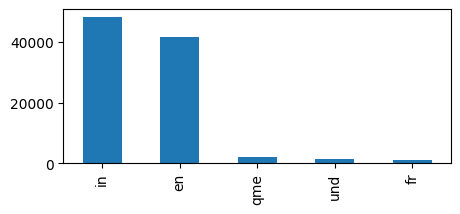

In [136]:
# top 5 languages
plt.figure(figsize=(5,2))
df['tweet_language'].value_counts().head(5).plot(kind='bar')
plt.show()

In [81]:
# in - indonesia, en - english, 
# und - undefined, fr - french , qme - unsure

Tested out microsoft translator and the output was not as expected

In [1]:
from dotenv import load_dotenv

load_dotenv('.env')

import os

subscription_key = os.getenv('SUBSCRIPTION_KEY')

In [82]:
subscription_key = '68de6e8eeafe43198c25c5eeac9537ae'
project_location = 'uksouth'

In [83]:
import requests
import uuid
import json

# API endpoint and subscription key
endpoint = "https://api.cognitive.microsofttranslator.com/translate"

# text to be translated
text = "jisellearn baru mau mng cel blm sempet kenalan"

# source and target languages
from_lang = "id-ID"
to_lang = "en"

# request headers
headers = {
    "Ocp-Apim-Subscription-Key": subscription_key,
    "Ocp-Apim-Subscription-Region": project_location,
    "Content-Type": "application/json",
    "X-ClientTraceId": str(uuid.uuid4())
}

# request body
body = [{
    "text": text
}]

# query parameters
params = {
    "api-version": "3.0",
    "from": from_lang,
    "to": to_lang
}

# Send a POST request to the API endpoint with the request headers, body, and query parameters
response = requests.post(endpoint, headers=headers, params=params, json=body)

# Extract the translated text from the response
translation = response.json()

# Print the translated text
print(translation)

[{'translations': [{'text': 'jisellearn just want mng cel blm sempet acquaintance', 'to': 'en'}]}]


In [84]:
df_test = df[df['tweet_language'] == 'in'][:10].copy()

In [85]:
df_test.iloc[0]['tweet_rendered_content']

'sjshsjjsh siapa yg nangis gw ya allah kak namjoon knp kok blm bobo skrng kak pls bobo udh malem kak udh malem jgn bikin gw nangis kak '

Moved on to Googles Translator : 

In [86]:
from deep_translator import GoogleTranslator
to_translate = df_test.iloc[1]['tweet_rendered_content']

translated = GoogleTranslator(source='id', target='en').translate(to_translate)
translated

"jisleearn just wanted to ask cel haven't gotten to know us yet it's okay I'm excited lu cil I hope to become a professor"

In [ ]:
from deep_translator import GoogleTranslator

def translate_to_target(x, source, target):
    translated = GoogleTranslator(source=source, target=target).translate(x)
    return translated

count = 0

def process_row(row, source_language, target_language, print_progress=False):
    global count
    count += 1
    if print_progress and count % 1000 == 0:
        print(f"Processed {count} rows")

    if row['tweet_language'] == source_language:
        return translate_to_target(row['tweet_rendered_content'], source_language, target_language)
    else:
        return row['tweet_rendered_content']

In [87]:
# Iterate over DataFrame rows
for index, row in df.iterrows():
    df.at[index, 'tweet_rendered_content'] = process_row('in', 'id','en', row, print_progress=True)

Processed 1000 rows
Processed 2000 rows
Processed 3000 rows
Processed 4000 rows
Processed 5000 rows
Processed 6000 rows
Processed 7000 rows
Processed 8000 rows
Processed 9000 rows
Processed 10000 rows
Processed 11000 rows
Processed 12000 rows
Processed 13000 rows
Processed 14000 rows
Processed 15000 rows
Processed 16000 rows
Processed 17000 rows
Processed 18000 rows
Processed 19000 rows
Processed 20000 rows
Processed 21000 rows
Processed 22000 rows
Processed 23000 rows
Processed 24000 rows
Processed 25000 rows
Processed 26000 rows
Processed 27000 rows
Processed 28000 rows
Processed 29000 rows
Processed 30000 rows
Processed 31000 rows
Processed 32000 rows
Processed 33000 rows
Processed 34000 rows
Processed 35000 rows
Processed 36000 rows
Processed 37000 rows
Processed 38000 rows
Processed 39000 rows
Processed 40000 rows
Processed 41000 rows
Processed 42000 rows
Processed 43000 rows
Processed 44000 rows
Processed 45000 rows
Processed 46000 rows
Processed 47000 rows
Processed 48000 rows
P

ConnectionError: ('Connection aborted.', OSError(22, 'Invalid argument'))

In [111]:
import itertools

# previous code broke around 49000
start_index = 49000
end_index = len(df)

# iterating over a sliced portion of DataFrame rows
for index, row in itertools.islice(df.iterrows(), start_index, end_index):
    df.at[index, 'tweet_rendered_content'] = process_row('in', 'id','en', row, print_progress=True)
    
# reset count for future use    
count = 0 

Processed 50000 rows
Processed 51000 rows
Processed 52000 rows
Processed 53000 rows
Processed 54000 rows
Processed 55000 rows
Processed 56000 rows
Processed 57000 rows
Processed 58000 rows
Processed 59000 rows
Processed 60000 rows
Processed 61000 rows
Processed 62000 rows
Processed 63000 rows
Processed 64000 rows
Processed 65000 rows
Processed 66000 rows
Processed 67000 rows
Processed 68000 rows
Processed 69000 rows
Processed 70000 rows
Processed 71000 rows
Processed 72000 rows
Processed 73000 rows
Processed 74000 rows
Processed 75000 rows
Processed 76000 rows
Processed 77000 rows
Processed 78000 rows
Processed 79000 rows
Processed 80000 rows
Processed 81000 rows
Processed 82000 rows
Processed 83000 rows
Processed 84000 rows
Processed 85000 rows
Processed 86000 rows
Processed 87000 rows
Processed 88000 rows
Processed 89000 rows
Processed 90000 rows
Processed 91000 rows
Processed 92000 rows
Processed 93000 rows
Processed 94000 rows
Processed 95000 rows
Processed 96000 rows
Processed 970

**TESTING FRENCH CONVERSION :**

In [115]:
df[df['tweet_language'] == 'fr'].iloc[2]['tweet_rendered_content']

'pessilapierre leblm arnaultraphael ivarmundus mdrrrrr il veut nous faire le mystérieux ce brank c’est quoi le délire twitter ça vous fais trop pousser des boule'

In [117]:
from deep_translator import GoogleTranslator
to_translate = df[df['tweet_language'] == 'fr'].iloc[2]['tweet_rendered_content']

translated = GoogleTranslator(source='fr', target='en').translate(to_translate)
translated

'pessilapierre leblm arnaultraphael ivarmundus mdrrrrr he wants to make us mysterious this brank what is the delirium twitter it makes you grow too many balls'

In [122]:
# Iterate over DataFrame rows
for index, row in df.iterrows():
    df.at[index, 'tweet_rendered_content'] = process_row(row,'fr', 'fr', 'en')

**Saving modified df as a csv to prevent loss of data**

In [124]:
# df.to_csv('/Users/alenjose/Desktop/data/project_data/self-scraped/edited/BLM_100k_translated_partially')

In [143]:
stopwords = nltk.corpus.stopwords.words('english')

def remove_stopwords(text):
    return " ".join([word for word in str(text).split() \
                       if word not in stopwords])


# df_english['tweet_rendered_content'] = df_english['tweet_rendered_content'].apply(lambda x:remove_stopwords(x))

In [146]:
df.loc[df['tweet_language'].isin(['en', 'in', 'fr']), 'tweet_rendered_content'] = \
                        df.loc[df['tweet_language'].isin(['en', 'in', 'fr']), 'tweet_rendered_content']\
                                        .apply(remove_stopwords)

In [147]:
# removing usernames
def remove_usernames(text):
    return re.sub('@[^\s]+','',text)

df['tweet_without_username'] = df['tweet_rendered_content']\
                                .apply(lambda x:remove_usernames(x))

In [149]:
df.columns

Index(['Unnamed: 0', 'date', 'tweet_rendered_content', 'tweet_id', 'user_name',
       'display_name', 'user_id', 'user_description', 'verified',
       'user_profile_created', 'user_follower_count', 'user_friend_count',
       'user_statuses_count', 'user_location', 'tweet_reply_count',
       'tweet_retweet_count', 'tweet_like_count', 'tweet_quote_count',
       'tweet_language', 'tweet_source', 'tweet_mentioned_users', 'year',
       'month', 'tweet_without_username'],
      dtype='object')

In [150]:
df.tweet_rendered_content

0        sjshsjjsh who's crying, oh god, sis Namjoon, I...
1                                             diiovane sim
2               someone needs check keepers betway account
3        jisleearn wanted ask cel gotten know us yet ok...
4                   remasxkarina right wkwkw slept yet huh
                               ...                        
99995                          I miss people forgotten yet
99996    walshfreedom dont like pointing hypocritical i...
99997                                      mayacounty yeah
99998    much interaction, look like cute child needs p...
99999                                   noidcall blm yeeha
Name: tweet_rendered_content, Length: 100000, dtype: object

In [151]:
df.to_csv('/Users/alenjose/Desktop/data/project_data/self-scraped/edited/BLM_100k_final.csv')